In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [99]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv('heartdisease_data.csv',header=None,names=columns)
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


### Exploratory Data Analysis

In [100]:
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [101]:
data.tail()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


#### Lets check the null values without using visualization

In [102]:
data.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

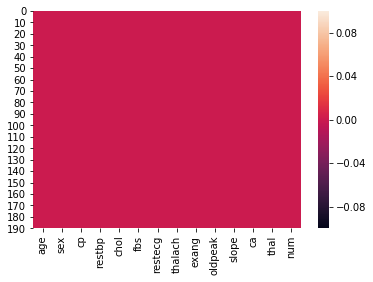

In [103]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [104]:
data = pd.DataFrame(data=data)
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [105]:
data.shape

(200, 14)

In [106]:
data.dtypes

age         int64
sex         int64
cp          int64
restbp     object
chol       object
fbs        object
restecg     int64
thalach    object
exang      object
oldpeak    object
slope      object
ca         object
thal       object
num         int64
dtype: object

In [107]:
data.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [108]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


#### Replacing ? with 0

In [109]:
data.replace('?', 0,inplace=True)

In [110]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0,0,0,0,0


In [111]:
data = data.apply(pd.to_numeric)

In [112]:
data.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age        200 non-null int64
sex        200 non-null int64
cp         200 non-null int64
restbp     200 non-null int64
chol       200 non-null int64
fbs        200 non-null int64
restecg    200 non-null int64
thalach    200 non-null int64
exang      200 non-null int64
oldpeak    200 non-null float64
slope      200 non-null int64
ca         200 non-null int64
thal       200 non-null int64
num        200 non-null int64
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


In [113]:
data.dtypes

age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
num          int64
dtype: object

In [114]:
data['restbp'].unique()

array([140, 130, 132, 142, 110, 120, 150, 180, 160, 126,   0, 128, 170,
       152, 116, 124, 122, 144, 154, 125, 104, 136, 134, 138, 178, 146,
       135, 158, 106, 112, 102,  96, 172, 155, 156, 118, 100, 190, 114,
       127], dtype=int64)

#### Lets find out the correlation 

In [115]:
dfcor = data.corr()
dfcor

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.034230,-0.038280,0.039836,0.049923,0.135728,0.002400,-0.056605,0.106330,0.134659,0.092595,NaN,-0.048196,0.287289
sex,0.034230,1.000000,0.038036,-0.038828,-0.101693,-0.059400,0.060621,-0.037544,-0.008804,0.058379,0.032002,NaN,-0.091739,0.147470
cp,-0.038280,0.038036,1.000000,0.226815,0.048981,-0.044416,0.034790,0.172127,0.277842,0.186268,0.213681,NaN,0.140282,0.168210
restbp,0.039836,-0.038828,0.226815,1.000000,0.003277,-0.010777,-0.002053,0.875749,0.577448,0.480473,0.487198,NaN,0.210492,0.085980
chol,0.049923,-0.101693,0.048981,0.003277,1.000000,0.156311,0.002391,-0.089120,0.034514,-0.060076,-0.059847,NaN,-0.068196,0.058451
fbs,0.135728,-0.059400,-0.044416,-0.010777,0.156311,1.000000,0.170616,-0.054900,-0.217705,-0.138832,-0.100362,NaN,0.127438,0.048940
restecg,0.002400,0.060621,0.034790,-0.002053,0.002391,0.170616,1.000000,-0.028064,-0.085550,-0.115200,-0.142594,NaN,0.068775,-0.032800
thalach,-0.056605,-0.037544,0.172127,0.875749,-0.089120,-0.054900,-0.028064,1.000000,0.519453,0.522083,0.522926,NaN,0.202736,0.058226
exang,0.106330,-0.008804,0.277842,0.577448,0.034514,-0.217705,-0.085550,0.519453,1.000000,0.520305,0.539932,NaN,0.146149,0.260111
oldpeak,0.134659,0.058379,0.186268,0.480473,-0.060076,-0.138832,-0.115200,0.522083,0.520305,1.000000,0.752707,NaN,-0.008228,0.383736


In [116]:
data = pd.DataFrame(data=data)
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0.0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0.0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0,0


In [117]:
data.shape

(200, 14)

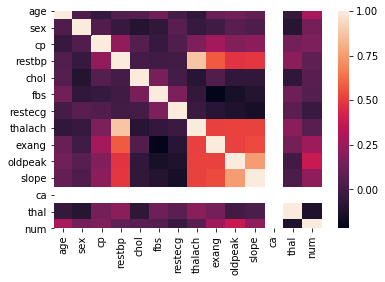

In [118]:
sns.heatmap(dfcor)

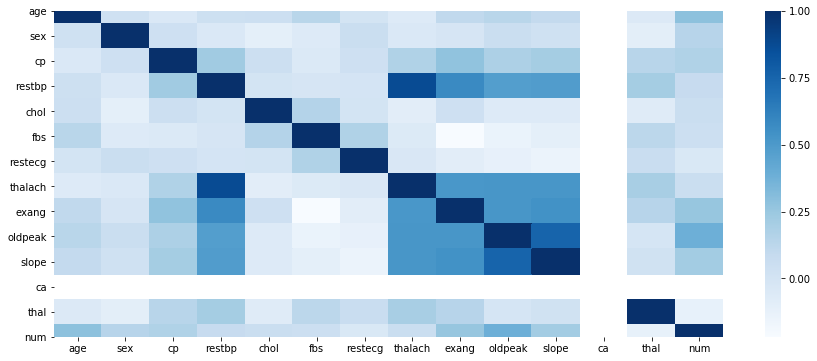

In [119]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

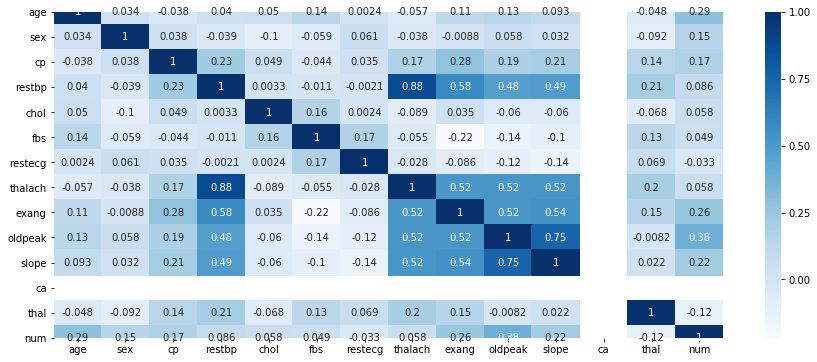

In [120]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Here ca column has no correlation between other columns so we are dropping this column 

In [121]:
data.drop("ca",axis=1,inplace=True)

In [122]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,0,0,1
196,62,1,1,0,139,0,1,0,0,0.0,0,0,0
197,55,1,4,122,223,1,1,100,0,0.0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0


#### Removing the Outliers

In [123]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(200, 13)
(185, 13)


#### Checking Skewness and Removing it

In [124]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

age       -0.404091
sex       -5.552105
cp        -1.648734
restbp    -0.750363
chol      -0.469975
fbs        0.680636
restecg    0.391463
thalach   -0.715818
exang      0.100883
oldpeak    0.823429
slope      0.468819
thal       1.905183
num        0.297393
dtype: float64

In [125]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [126]:
#Lets Again Check the Skewness
data.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
restbp    -0.750363
chol      -0.469975
fbs        0.680636
restecg    0.391463
thalach   -0.715818
exang      0.100883
oldpeak    0.314899
slope      0.468819
thal       1.819829
num        0.297393
dtype: float64

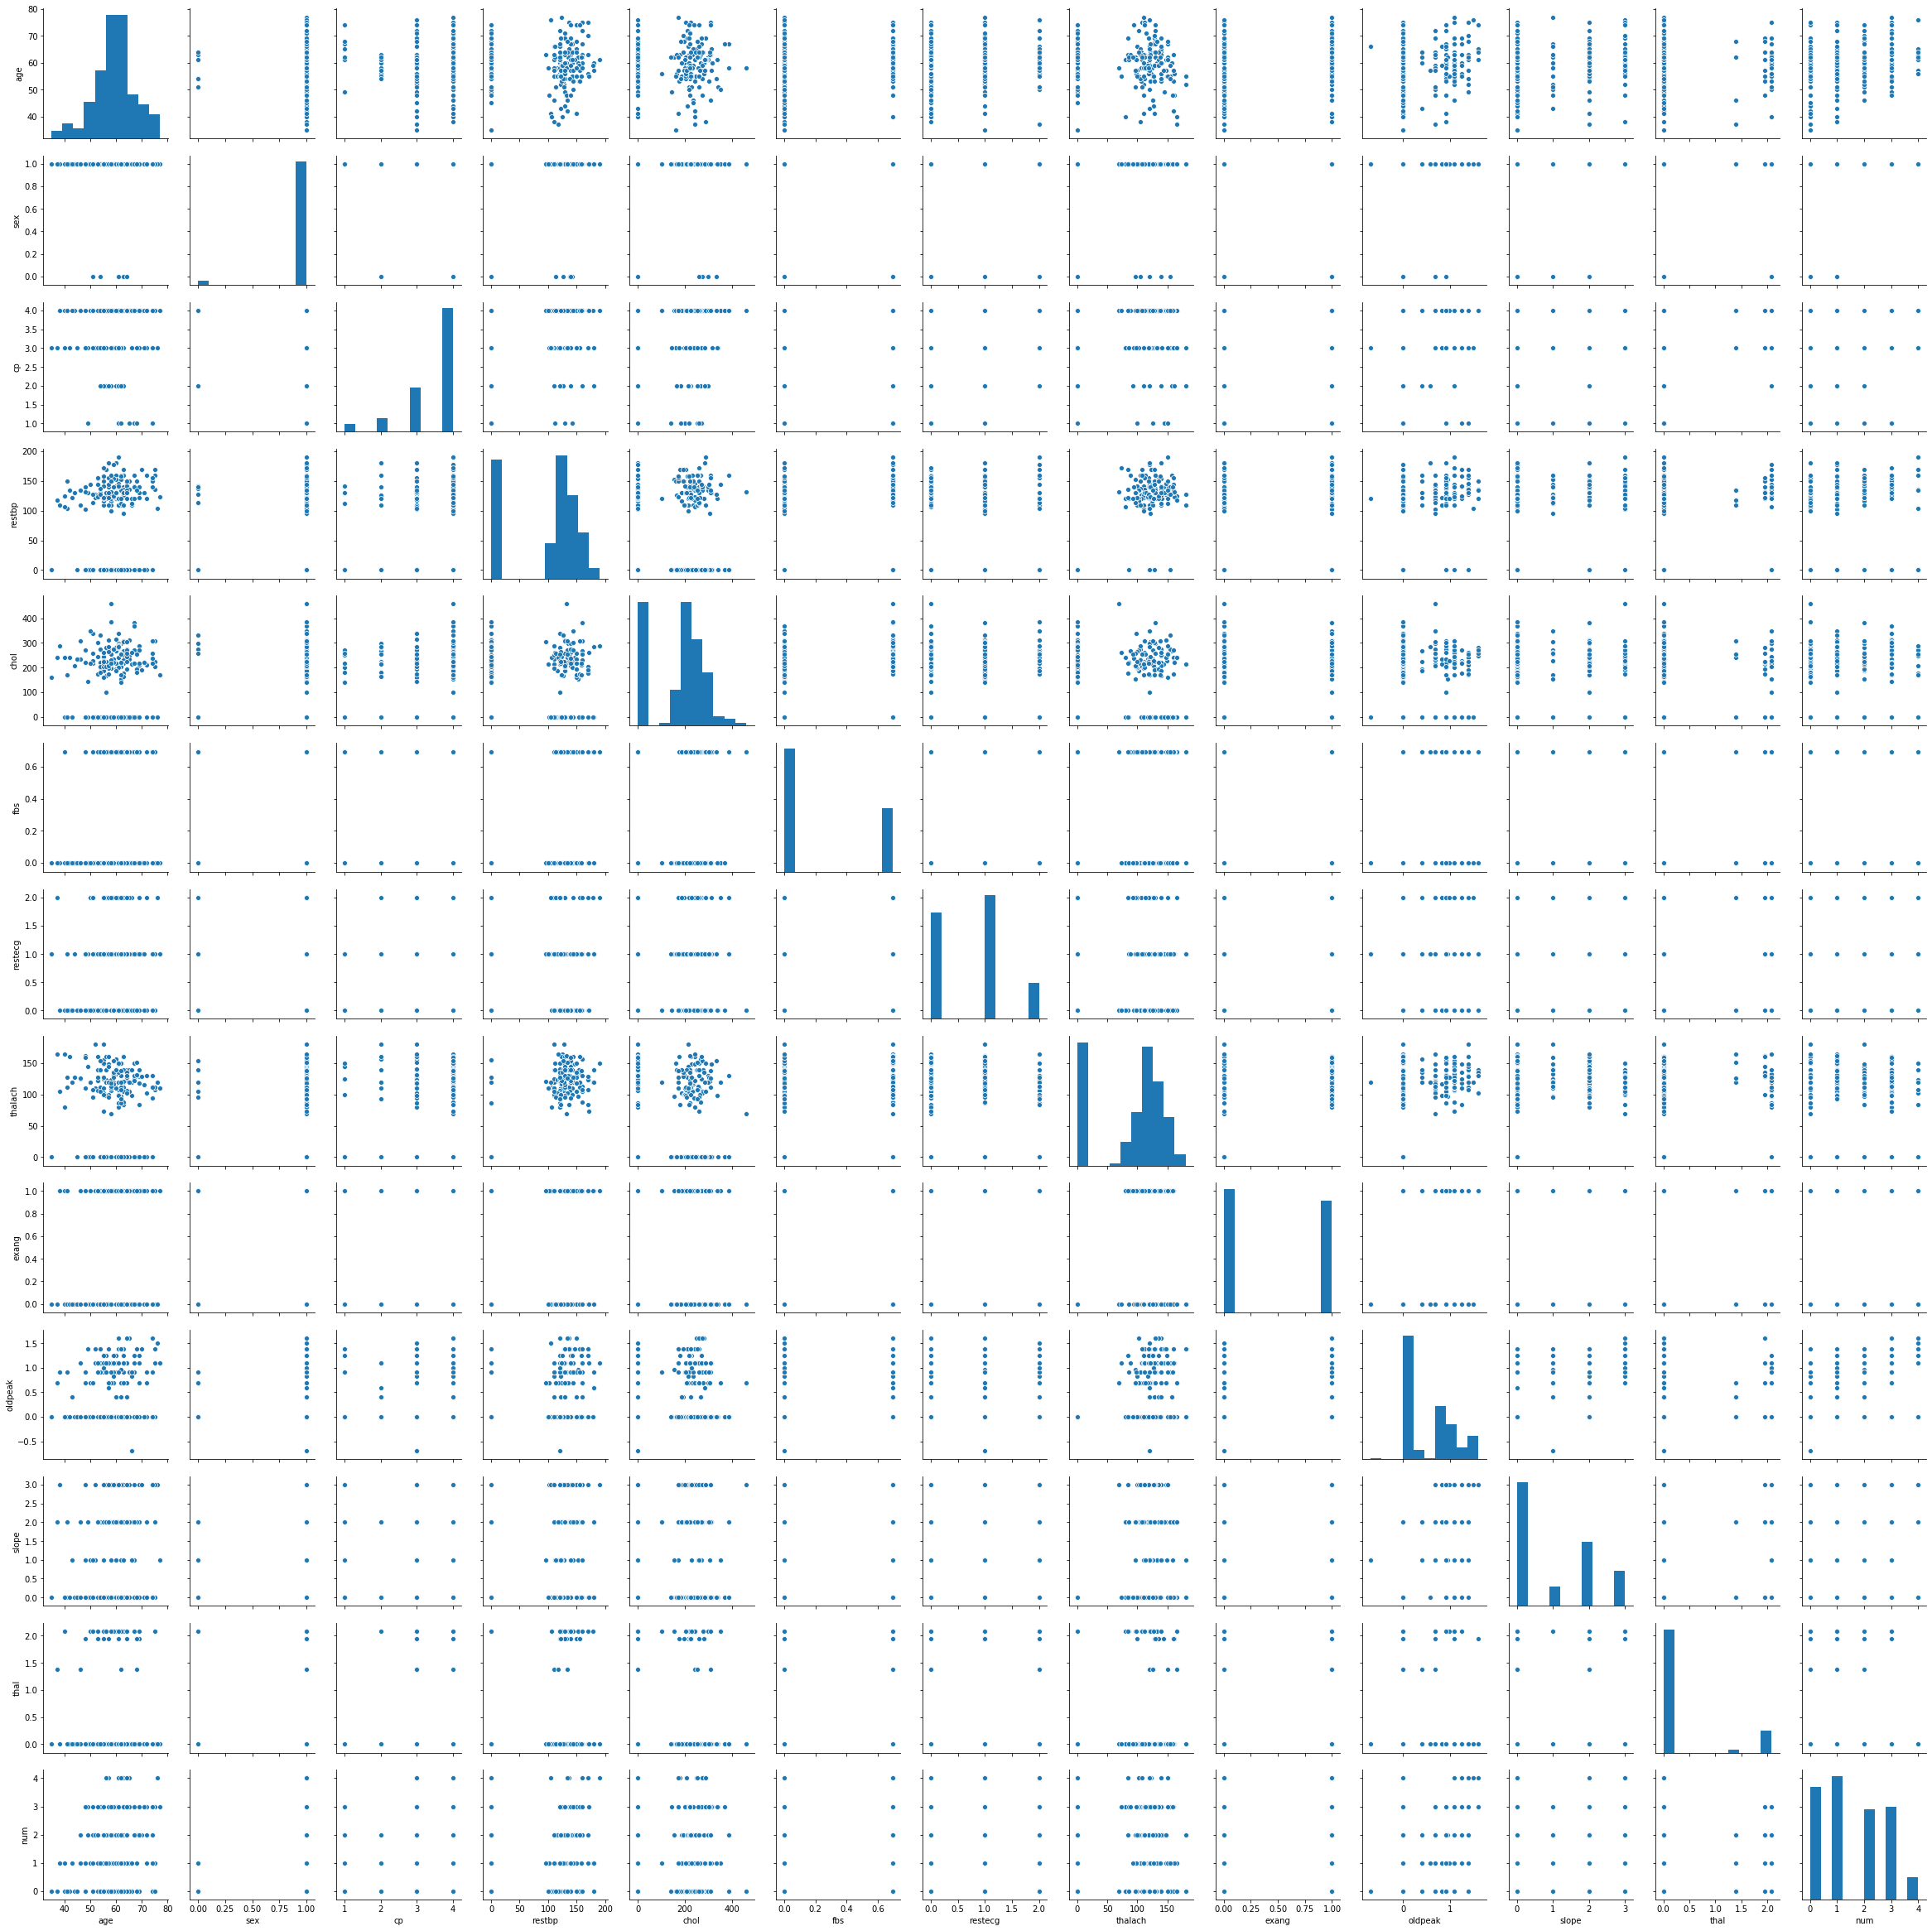

In [127]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### LinePlot

In [128]:
data.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

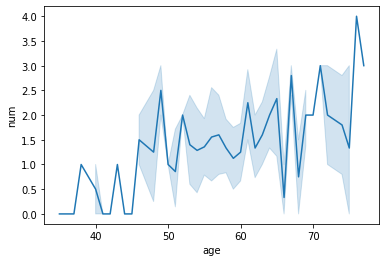

In [129]:
#Lets check the how age is changing with respect to num
sns.lineplot(data["age"],data["num"])
plt.show()

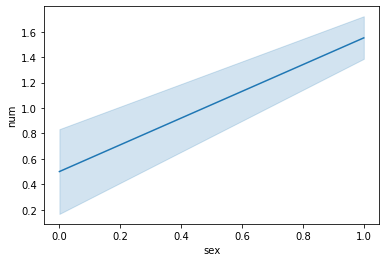

In [130]:
#Lets check the how sex is changing with respect to num
sns.lineplot(data["sex"],data["num"])
plt.show()

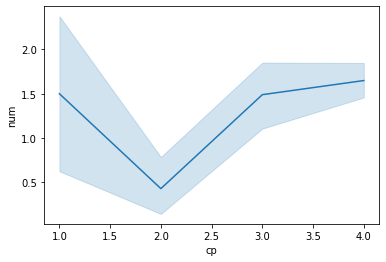

In [131]:
#Lets check the how cp is changing with respect to num
sns.lineplot(data["cp"],data["num"])
plt.show()

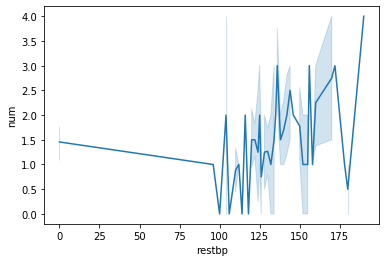

In [132]:
#Lets check the how restbp is changing with respect to num
sns.lineplot(data["restbp"],data["num"])
plt.show()

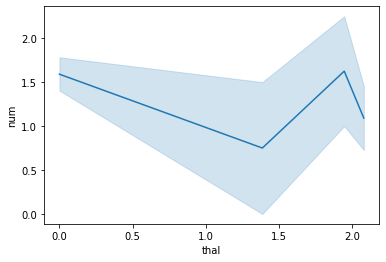

In [133]:
#Lets check the how sex is changing with respect to num
sns.lineplot(data["thal"],data["num"])
plt.show()

#### Plotting Boxplot through Iteration

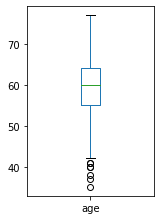

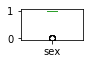

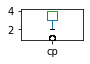

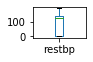

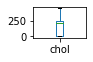

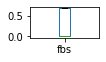

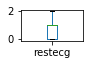

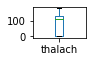

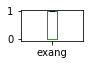

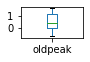

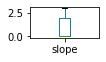

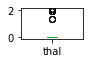

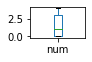

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

#### Plotting Displot Through Iteration

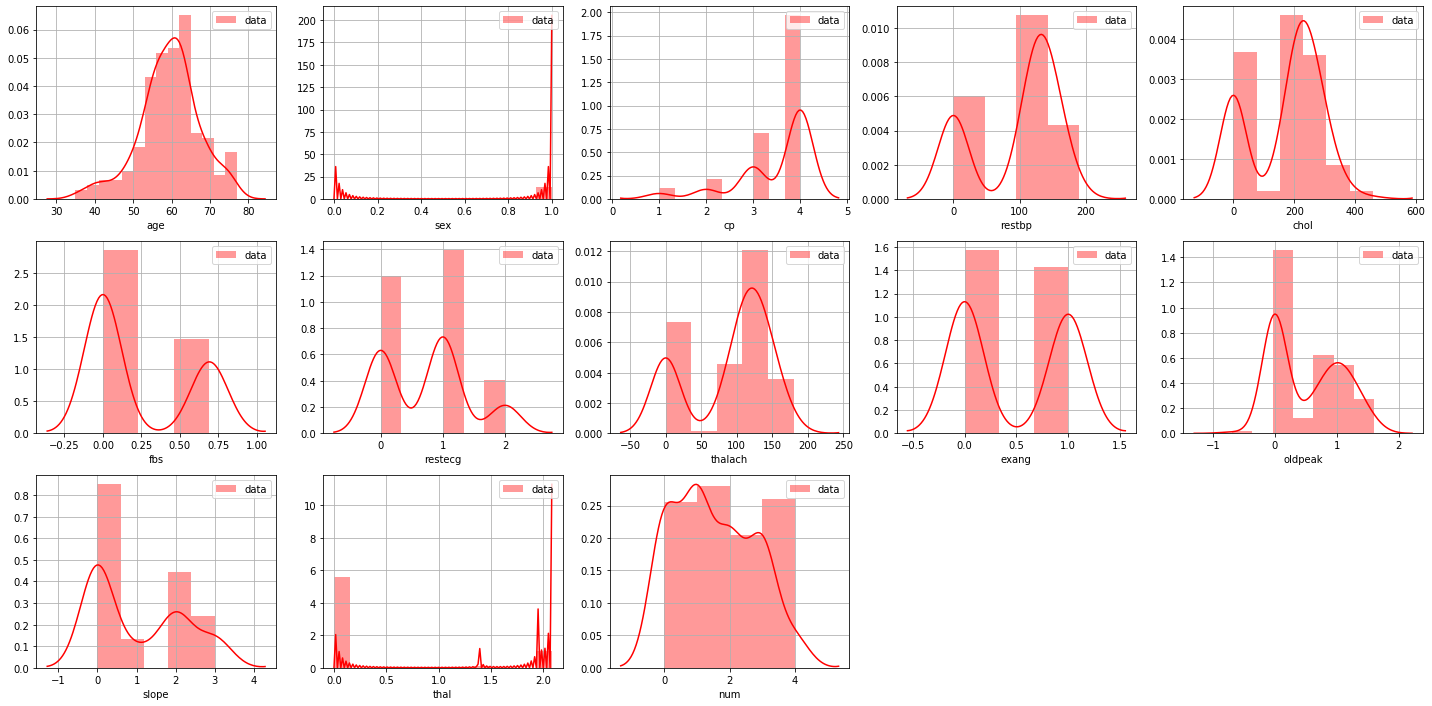

In [135]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Plotting Data using Scatter Plot

In [136]:
data.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

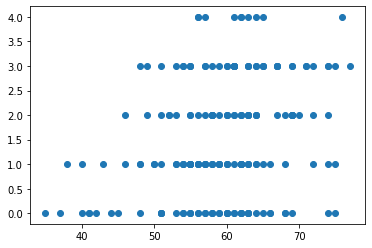

In [137]:
plt.scatter(data['age'],data['num'])

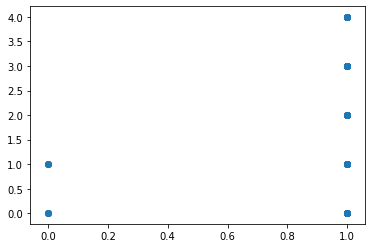

In [138]:
plt.scatter(data['sex'],data['num'])

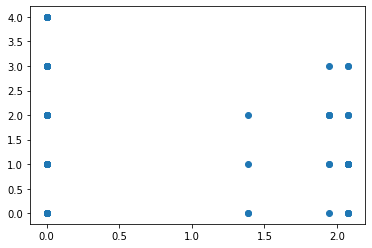

In [139]:
plt.scatter(data['thal'],data['num'])

### Column Plot

In [140]:
collist = data.columns.values
ncols=12
nrows=10

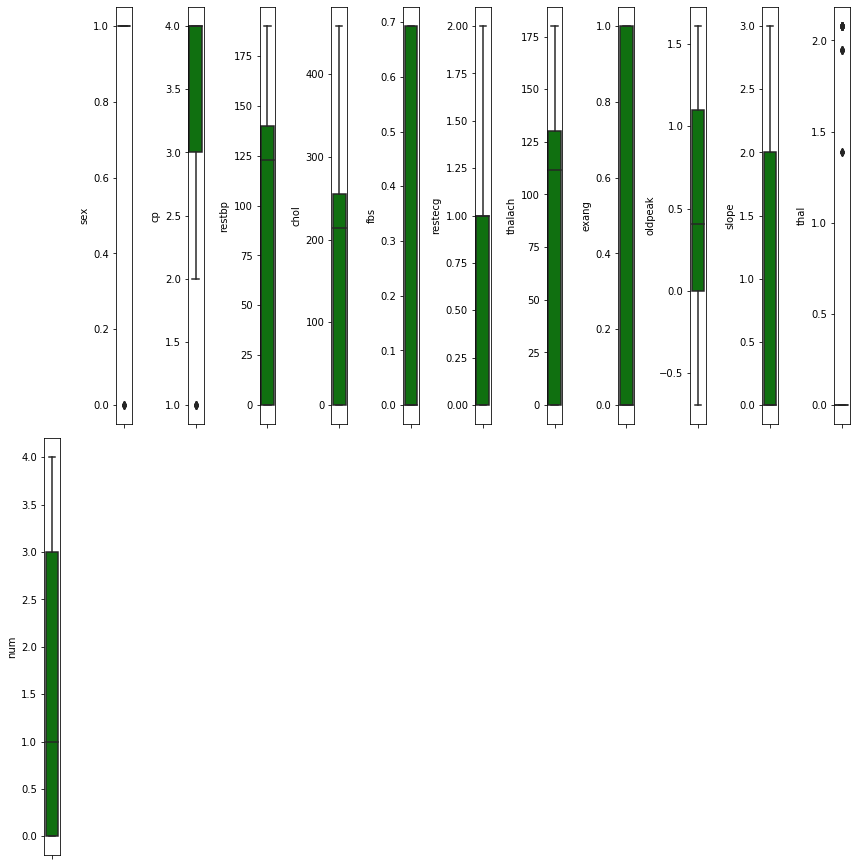

In [141]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Here we found sex and thal column has very less impact on output (num) so we are deleting these columns (By Refering all Graphs) 

In [142]:
data.drop("sex",axis=1,inplace=True)

In [143]:
data.drop("thal",axis=1,inplace=True)

In [144]:
data

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,4,140,260,0.000000,1,112,1,1.386294,2,2
1,44,4,130,209,0.000000,1,127,0,0.000000,0,0
2,60,4,132,218,0.000000,1,140,1,0.916291,3,2
3,55,4,142,228,0.000000,1,149,1,1.252763,1,1
4,66,3,110,213,0.693147,2,99,1,0.832909,2,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,4,127,333,0.693147,1,154,0,0.000000,0,1
196,62,1,0,139,0.000000,1,0,0,0.000000,0,0
197,55,4,122,223,0.693147,1,100,0,0.000000,0,2
198,58,4,0,385,0.693147,2,0,0,0.000000,0,0


In [145]:
data['num'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

#### Separating X and Y Variable

In [146]:
data

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,4,140,260,0.000000,1,112,1,1.386294,2,2
1,44,4,130,209,0.000000,1,127,0,0.000000,0,0
2,60,4,132,218,0.000000,1,140,1,0.916291,3,2
3,55,4,142,228,0.000000,1,149,1,1.252763,1,1
4,66,3,110,213,0.693147,2,99,1,0.832909,2,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,4,127,333,0.693147,1,154,0,0.000000,0,1
196,62,1,0,139,0.000000,1,0,0,0.000000,0,0
197,55,4,122,223,0.693147,1,100,0,0.000000,0,2
198,58,4,0,385,0.693147,2,0,0,0.000000,0,0


In [147]:
X = data.drop("num", axis=1)

In [148]:
X

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,4,140,260,0.000000,1,112,1,1.386294,2
1,44,4,130,209,0.000000,1,127,0,0.000000,0
2,60,4,132,218,0.000000,1,140,1,0.916291,3
3,55,4,142,228,0.000000,1,149,1,1.252763,1
4,66,3,110,213,0.693147,2,99,1,0.832909,2
...,...,...,...,...,...,...,...,...,...,...
195,54,4,127,333,0.693147,1,154,0,0.000000,0
196,62,1,0,139,0.000000,1,0,0,0.000000,0
197,55,4,122,223,0.693147,1,100,0,0.000000,0
198,58,4,0,385,0.693147,2,0,0,0.000000,0


In [149]:
Y = data["num"]
Y

0      2
1      0
2      2
3      1
4      0
      ..
195    1
196    0
197    2
198    0
199    1
Name: num, Length: 200, dtype: int64

In [150]:
X.shape

(200, 10)

In [151]:
X

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,4,140,260,0.000000,1,112,1,1.386294,2
1,44,4,130,209,0.000000,1,127,0,0.000000,0
2,60,4,132,218,0.000000,1,140,1,0.916291,3
3,55,4,142,228,0.000000,1,149,1,1.252763,1
4,66,3,110,213,0.693147,2,99,1,0.832909,2
...,...,...,...,...,...,...,...,...,...,...
195,54,4,127,333,0.693147,1,154,0,0.000000,0
196,62,1,0,139,0.000000,1,0,0,0.000000,0
197,55,4,122,223,0.693147,1,100,0,0.000000,0
198,58,4,0,385,0.693147,2,0,0,0.000000,0


In [152]:
Y.shape

(200,)

In [153]:
Y = Y.values.reshape(-1,1)

In [154]:
Y

array([[2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [3],
       [0],
       [3],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [4],
       [1],
       [0],
       [0],
       [2],
       [1],
       [3],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [0],
       [1],
       [0],
       [3],
       [1],
       [3],
       [0],
       [4],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [3],
       [0],
       [1],
       [0],
       [2],
       [1],
       [4],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [3],
       [3],
       [1],
       [2],
       [3],
       [2],
       [1],
       [0],
       [2],
       [2],
    

In [155]:
Y.shape

(200, 1)

In [156]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [157]:
train_X.shape

(156, 10)

In [158]:
test_X.shape

(44, 10)

In [159]:
train_Y.shape

(156, 1)

In [160]:
test_Y.shape

(44, 1)

### Boost the Dataset by AdaBoost and GradiantBoost

In [161]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.4358974358974359
[3 2 3 3 2 3 3 2 3 1 2 2 3 2 1 0 2 2 2 2 3 0 2 2 0 2 2 2 1 3 1 3 1 1 1 1 1
 3 2 1 3 1 0 1]


0.25

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

1.0
[1 1 2 2 3 3 1 3 3 1 2 0 2 2 1 0 3 2 0 1 3 2 2 1 0 3 1 1 1 1 1 2 0 1 1 0 1
 1 1 1 1 3 1 1]


0.3181818181818182

### Boosting though GradientBoost Regressor By using Parameters

In [163]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [164]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.8245772634441503
R2 sq:  0.8245772634441503
Mean squared error: 1.64
Test Variance score: 0.15


### Lets Visualize the Goodness of the Prediction

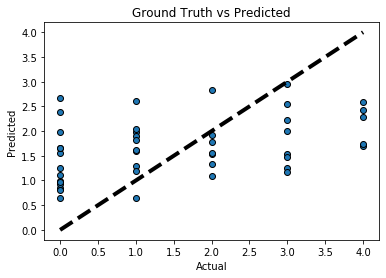

In [165]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [166]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.25
[[2 1 5 3 3]
 [1 5 2 1 1]
 [2 1 3 0 1]
 [0 3 3 0 2]
 [0 0 2 2 1]]
              precision    recall  f1-score   support

           0       0.40      0.14      0.21        14
           1       0.50      0.50      0.50        10
           2       0.20      0.43      0.27         7
           3       0.00      0.00      0.00         8
           4       0.12      0.20      0.15         5

    accuracy                           0.25        44
   macro avg       0.25      0.25      0.23        44
weighted avg       0.29      0.25      0.24        44



#### Pediction using Support Vector Machine

In [167]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.25
[[ 1 13  0  0  0]
 [ 0 10  0  0  0]
 [ 0  7  0  0  0]
 [ 0  8  0  0  0]
 [ 0  5  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.23      1.00      0.38        10
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         5

    accuracy                           0.25        44
   macro avg       0.25      0.21      0.10        44
weighted avg       0.37      0.25      0.13        44



### Support Vector Machine by using Crossval Score

In [168]:
from sklearn.model_selection import cross_val_score
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.27906977 0.275      0.23076923 0.28205128 0.28205128]
Mean Scores 0.26978831246273105
Standard Deviation 0.0196802270107803
Y Prediction values
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


0.27

### Use GridSearchCV for Support Vector Machine

In [169]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.291, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.294, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.300, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.291, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.294, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.300, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.280, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.273, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.314, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.300, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.327, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.314, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.320, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [170]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [171]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.57      0.29      0.38        14
           1       0.25      0.60      0.35        10
           2       0.00      0.00      0.00         7
           3       0.43      0.38      0.40         8
           4       0.00      0.00      0.00         5

    accuracy                           0.30        44
   macro avg       0.25      0.25      0.23        44
weighted avg       0.32      0.30      0.27        44



#### Boosting through Support Vector Classifier

In [172]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.22727272727272727


### Prediction Using DecisionTreeClassifier

In [173]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.3409090909090909
[[4 2 3 5 0]
 [2 6 0 2 0]
 [0 4 1 2 0]
 [1 5 0 2 0]
 [0 1 1 1 2]]
              precision    recall  f1-score   support

           0       0.57      0.29      0.38        14
           1       0.33      0.60      0.43        10
           2       0.20      0.14      0.17         7
           3       0.17      0.25      0.20         8
           4       1.00      0.40      0.57         5

    accuracy                           0.34        44
   macro avg       0.45      0.34      0.35        44
weighted avg       0.43      0.34      0.35        44



### DecisionTreeClassifier by using Crossval Score

In [174]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.2525     0.29058442 0.27930432 0.22830991 0.34410867]
Mean Scores 0.2789614622600893
Standard Deviation 0.039102834614197224
Y Prediction values
[1 0 1 3 2 0 0 2 2 1 0 1 1 1 1 0 2 1 4 1 1 3 1 1 2 2 1 1 1 0 0 4 0 1 1 1 2
 2 1 2 0 0 0 3 1 3 1 3 0 0 1 0 0 3 3 2 0 0 1 0 0 2 3 2 2 1 1 1 2 0 2 3 0 3
 3 3 2 3 4 2 3 4 2 1 2 1 2 0 4 0 2 2 2 0 1 3 0 1 2 4 0 3 2 2 1 4 3 1 2 3 3
 1 0 2 0 3 1 1 4 3 4 4 2 1 0 0 1 4 1 4 1 1 3 4 4 1 0 1 1 2 4 1 3 2 3 3 3 0
 3 3 0 3 1 1 2 1 3 0 2 1 0 3 2 3 2 2 0 3 3 1 1 0 2 1 0 0 3 2 1 1 0 0 1 1 1
 3 3 2 3 3 1 1 1 1 0 0 0 4 4 1]


array([[16, 12,  7, 10,  6],
       [11, 27,  8,  9,  1],
       [ 6, 11, 13,  6,  5],
       [ 9,  8,  7, 13,  5],
       [ 2,  3,  4,  1,  0]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    3.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [176]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 30, 'min_samples_split': 4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [177]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.50      0.29      0.36        14
           1       0.30      0.70      0.42        10
           2       0.00      0.00      0.00         7
           3       0.22      0.25      0.24         8
           4       1.00      0.20      0.33         5

    accuracy                           0.32        44
   macro avg       0.41      0.29      0.27        44
weighted avg       0.38      0.32      0.29        44



### Boost Decision Tree Classifier

In [178]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [179]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 0, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 3, 2, 2, 0, 3, 1, 1, 0, 2, 0,
       2, 0, 3, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 0, 3, 3, 2, 1, 3, 2, 3, 1],
      dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.22727272727272727


In [181]:
confusion_matrix(test_Y, predictions)

array([[3, 5, 3, 3, 0],
       [2, 2, 2, 4, 0],
       [1, 1, 3, 2, 0],
       [2, 1, 3, 2, 0],
       [0, 1, 1, 3, 0]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [182]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.2727272727272727
[[5 6 3 0 0]
 [3 5 1 1 0]
 [1 5 0 1 0]
 [1 3 2 2 0]
 [3 1 0 1 0]]
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        14
           1       0.25      0.50      0.33        10
           2       0.00      0.00      0.00         7
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         5

    accuracy                           0.27        44
   macro avg       0.21      0.22      0.20        44
weighted avg       0.25      0.27      0.25        44



### KNN Nearest Neighbor by using Crossval Score 

In [183]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.17391304 0.19047619 0.25       0.3        0.4        0.3
 0.15789474 0.26315789 0.42105263 0.31578947]
Mean Scores 0.2772283970796557
Standard Deviation 0.0846535410309062
Y Prediction values
[3 1 3 2 0 1 3 2 2 0 0 2 1 0 2 0 1 1 1 2 1 1 1 0 2 2 0 1 0 0 0 1 1 0 1 2 1
 1 0 2 1 2 1 1 0 1 1 1 1 0 0 1 3 1 1 0 0 3 1 0 1 1 2 0 1 3 2 1 1 3 1 1 0 0
 0 2 1 3 1 3 1 0 2 1 2 1 2 3 2 0 3 0 2 0 1 3 0 0 1 1 1 3 1 1 2 1 2 0 0 0 3
 1 0 1 0 3 0 1 2 0 0 2 0 0 1 1 3 1 2 0 0 1 2 0 3 0 1 1 1 2 2 1 0 1 0 0 1 0
 1 3 0 3 1 2 1 0 1 0 1 0 0 3 2 0 0 1 0 0 0 0 1 0 2 3 0 0 1 3 3 1 1 1 1 3 0
 0 0 1 0 0 1 3 1 0 2 1 0 0 3 1]
y_pred.shape (200,)


array([[24, 19,  6,  2,  0],
       [20, 21, 10,  5,  0],
       [13, 18,  5,  5,  0],
       [ 8, 12,  9, 13,  0],
       [ 3,  5,  1,  1,  0]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [185]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.2550976800976801, 0.29471764346764345, 0.27603785103785106, 0.26967490842490843, 0.2813949938949939, 0.32002747252747255, 0.34194597069597066, 0.34320207570207567, 0.31003968253968256, 0.2999542124542124, 0.313313492063492, 0.2745955433455433, 0.2582600732600733, 0.2700656288156288, 0.2826190476190476, 0.309478021978022, 0.26603785103785105, 0.2876724664224664, 0.27998015873015875, 0.2799801587301587, 0.2862301587301587, 0.25921092796092793, 0.24714896214896215, 0.28228785103785103, 0.26681776556776554, 0.2756211843711844, 0.2525442612942613, 0.2682600732600733, 0.25287545787545784, 0.2584310134310134]


In [186]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [187]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [188]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [189]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [190]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 7}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [191]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43        14
           1       0.29      0.50      0.37        10
           2       0.12      0.14      0.13         7
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         5

    accuracy                           0.32        44
   macro avg       0.25      0.26      0.25        44
weighted avg       0.30      0.32      0.30        44



#### Bagging of KNN Nearest Neighbor 

In [192]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [193]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [194]:
predictions = baggingknn.predict(test_X)
predictions

array([2, 1, 0, 1, 3, 3, 1, 3, 3, 1, 2, 1, 2, 3, 1, 0, 3, 1, 1, 1, 3, 2,
       1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 0, 1, 1],
      dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.36363636363636365


In [196]:
confusion_matrix(test_Y, predictions)

array([[3, 6, 3, 2, 0],
       [0, 7, 1, 2, 0],
       [2, 3, 2, 0, 0],
       [0, 3, 1, 4, 0],
       [0, 3, 1, 1, 0]], dtype=int64)

### Prediction Using RandomForest Classification

In [197]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.3409090909090909
[[4 5 4 1 0]
 [0 6 2 2 0]
 [1 4 1 1 0]
 [0 3 1 4 0]
 [0 1 3 1 0]]
              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.32      0.60      0.41        10
           2       0.09      0.14      0.11         7
           3       0.44      0.50      0.47         8
           4       0.00      0.00      0.00         5

    accuracy                           0.34        44
   macro avg       0.33      0.31      0.28        44
weighted avg       0.42      0.34      0.33        44



### RandomForestClassifier Using Cross_Val_Score

In [198]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.43478261 0.28571429 0.55       0.4        0.35       0.4
 0.52631579 0.21052632 0.42105263 0.21052632]
Mean Scores 0.3788917947041517
Standard Deviation 0.11091209899408337
Y Prediction values
[2 0 2 3 3 2 2 2 2 1 0 1 1 1 1 2 4 1 0 1 1 2 1 1 0 3 1 1 1 0 0 2 1 0 2 2 2
 3 1 1 0 1 1 0 1 1 1 1 2 1 2 0 3 1 1 2 0 3 0 2 0 2 2 0 3 0 0 1 0 0 0 1 0 1
 3 2 0 0 1 2 2 3 0 1 2 1 2 1 2 3 2 0 0 0 1 3 0 1 2 0 2 2 2 3 2 4 1 1 0 0 3
 0 0 2 0 3 2 1 2 0 0 4 1 1 0 0 1 4 1 2 1 2 2 0 3 0 0 0 1 2 2 1 3 4 3 0 2 4
 1 3 1 1 1 3 1 1 1 2 0 1 0 3 2 3 0 2 3 3 3 0 2 0 3 3 0 0 2 2 1 1 0 3 1 1 1
 3 3 2 3 3 1 3 1 0 0 3 0 0 3 1]
y_pred.shape (200,)


array([[22, 14,  8,  7,  0],
       [10, 25, 13,  7,  1],
       [ 9, 11, 12,  8,  1],
       [10,  8, 11, 11,  2],
       [ 3,  2,  2,  1,  2]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [199]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [200]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [201]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.25      0.60      0.35        10
           2       0.11      0.14      0.12         7
           3       0.38      0.38      0.38         8
           4       0.00      0.00      0.00         5

    accuracy                           0.27        44
   macro avg       0.28      0.25      0.22        44
weighted avg       0.35      0.27      0.24        44



#### Bagging of Random Forest Classifier 

In [202]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [203]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [204]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 2, 1, 2, 2, 2, 3, 3, 0, 0, 1, 3, 1,
       1, 2, 1, 0, 2, 2, 1, 2, 3, 2, 1, 2, 1, 0, 1, 1, 3, 0, 1, 3, 1, 1],
      dtype=int64)

In [205]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.3181818181818182


In [206]:
confusion_matrix(test_Y, predictionsrf)

array([[2, 5, 3, 4, 0],
       [2, 6, 1, 1, 0],
       [0, 3, 3, 1, 0],
       [0, 2, 3, 3, 0],
       [1, 1, 1, 2, 0]], dtype=int64)

#### NOTE::Among all models modelgbr gives the Highest accuracy(82%) so we are going to save this model

In [207]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(modelgbr,'heartdisease.pkl')

['heartdisease.pkl']